In [1]:
#As always, we import everything
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Question 1: Propensity score matching

First, we define the functions that will help us plot our data later.

In [2]:
def show_hist(data, title, xlabel, ylabel):
    plt.hist(data, range=[0, 40000])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
def show_box_plot(data1, data2, legend1, legend2):
    plt.boxplot([data1, data2])
    plt.xticks([1, 2], [legend1, legend2])
    plt.show()

In [4]:
def show_bar_plots(counts1, total1, counts2, total2, colors, title, ylabel, xlabels, xticklabels):
    width = 1/(len(counts1) + 1)
    fig, ax = plt.subplots(figsize=(20,7))
    pos = list(range(2))

    plt.bar(pos, [counts1[0] / total1, counts2[0] / total2], width, color=colors[0])
    plt.bar([p + width for p in pos], [counts1[1] / total1, counts2[1] / total2], width, color=colors[1])
    if len(counts1) > 2:
        plt.bar([p + 2 * width for p in pos], [counts1[2] / total1, counts2[2] / total2], width, color=colors[2])

    ax.set_ylabel(ylabel)

    ax.set_title(title)

    denom = 1 if len(counts1) == 3 else 2
    ax.set_xticks([p + width/denom for p in pos])

    plt.legend(xlabels, loc='upper left')

    ax.set_xticklabels(xticklabels)

    plt.grid(axis='y')
    plt.show()

### 1. A naive analysis

We import the LaLonde dataset.

In [5]:
data = pd.read_csv('lalonde.csv')
data.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [6]:
data_non_treatment = data[data.treat == 0][['re78']].values
data_treatment = data[data.treat == 1][['re78']].values

non_treatment_count = len(data_non_treatment)
treatment_count = len(data_treatment)

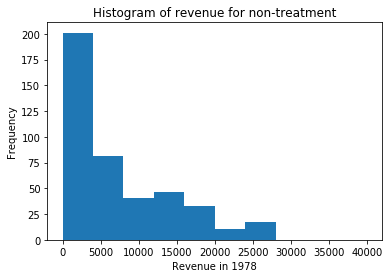

In [7]:
show_hist(data_non_treatment, "Histogram of revenue for non-treatment", "Revenue in 1978", "Frequency")

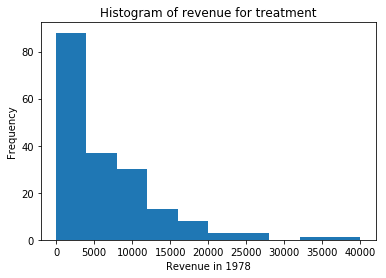

In [8]:
show_hist(data_treatment, "Histogram of revenue for treatment", "Revenue in 1978", "Frequency")

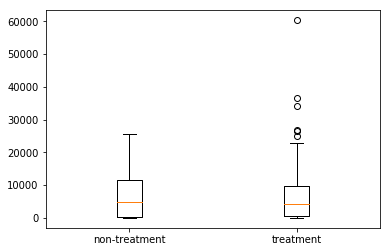

In [9]:
show_box_plot(data_non_treatment, data_treatment, 'non-treatment', 'treatment')

As we can see from those basic histograms and the box plot, the 'treatment' population has a lower income (except for a few outliers).
A naïve researcher could conclude that the treatment is not only inneficient, but also diminishes the potential income of the participant.

### 2. A closer look at the data

Now, let's look at each variable to see if there is differences between the two groups.

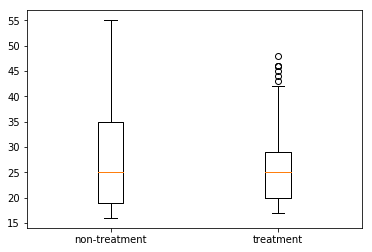

In [10]:
age_non_treatment = data[data.treat == 0][['age']].values
age_treatment = data[data.treat == 1][['age']].values

show_box_plot(age_non_treatment, age_treatment, 'non-treatment', 'treatment')

First, we can see that the treated group is generally younger.

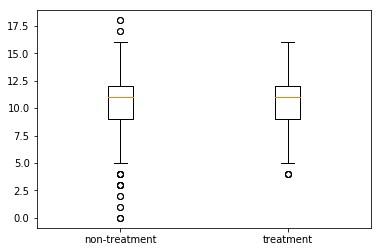

In [11]:
educ_non_treatment = data[data.treat == 0][['educ']].values
educ_treatment = data[data.treat == 1][['educ']].values

show_box_plot(educ_non_treatment, educ_treatment, 'non-treatment', 'treatment')

For the education, the two groups are very similar, except for a few outliers.

In [12]:
black_non_treatment = len(data[(data.treat == 0) & (data.black == 1)])
hispan_non_treatment = len(data[(data.treat == 0) & (data.hispan == 1)])
white_non_treatment = non_treatment_count - black_non_treatment - hispan_non_treatment

black_treatment = len(data[(data.treat == 1) & (data.black == 1)])
hispan_treatment = len(data[(data.treat == 1) & (data.hispan == 1)])
white_treatment = treatment_count - black_treatment - hispan_treatment

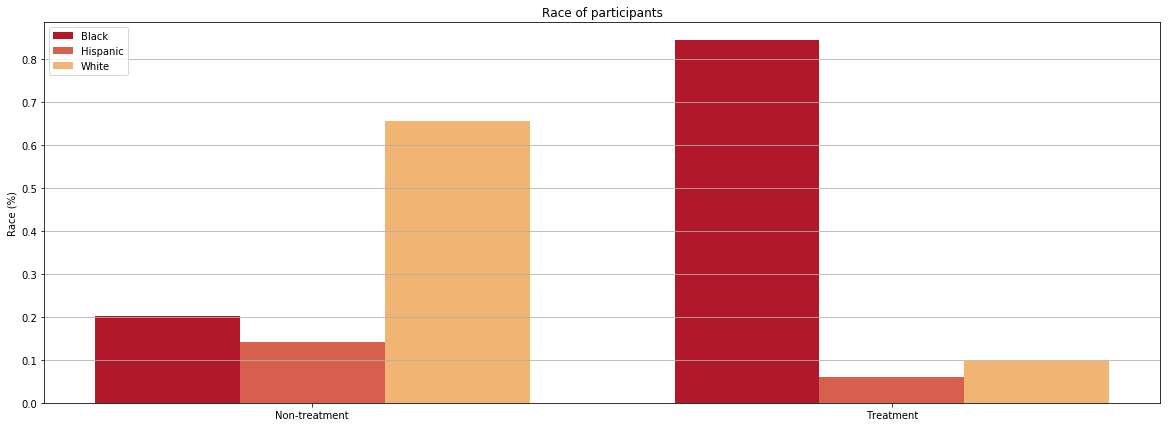

In [13]:
show_bar_plots([black_non_treatment, hispan_non_treatment, white_non_treatment], 
               non_treatment_count, 
               [black_treatment, hispan_treatment, white_treatment],
               treatment_count,
               ['#b2182b','#d6604d','#f0b572'],
               'Race of participants',
               'Race (%)',
               ['Black', 'Hispanic', 'White'],
               ['Non-treatment', 'Treatment'])

We can see here that there is a huge difference in terms of races in the two groups. The majority of the non-treatment is white, whereas the overwhelming majority of the treatment group is black. This can influence the study as the race in the US has a significant correlation with the socio-economic conditions of the person.

In [14]:
married_non_treatment = len(data[(data.treat == 0) & (data.married == 1)])
not_married_non_treatment = non_treatment_count - married_non_treatment

married_treatment = len(data[(data.treat == 1) & (data.married == 1)])
not_married_treatment = treatment_count - married_treatment

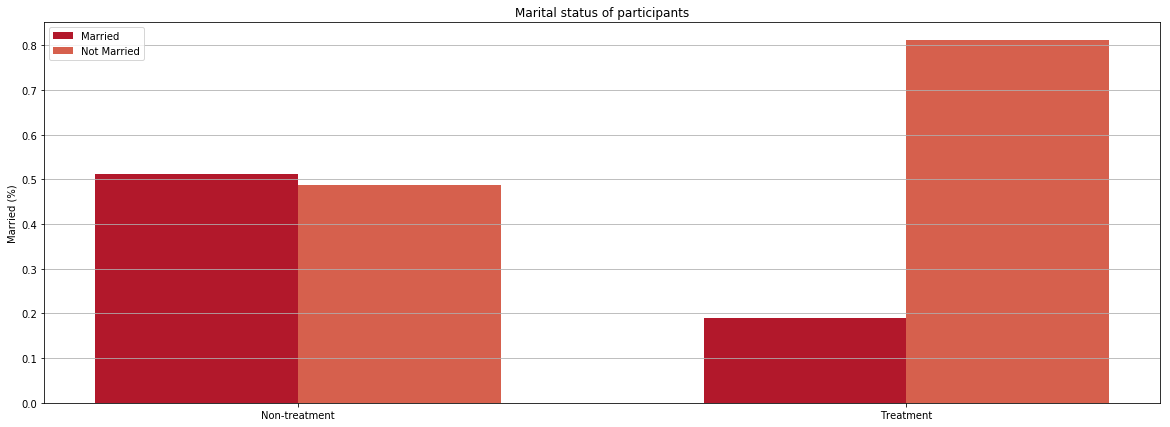

In [15]:
show_bar_plots([married_non_treatment, not_married_non_treatment], 
               non_treatment_count, 
               [married_treatment, not_married_treatment],
               treatment_count,
               ['#b2182b','#d6604d'],
               'Marital status of participants',
               'Married (%)',
               ['Married', 'Not Married'],
               ['Non-treatment', 'Treatment'])

There is a much bigger share of the treated group which is not married, which can partly be explained by the fact that the treated group is younger.

In [16]:
degree_non_treatment = len(data[(data.treat == 0) & (data.nodegree == 0)])
nodegree_non_treatment = non_treatment_count - degree_non_treatment

degree_treatment = len(data[(data.treat == 1) & (data.nodegree == 0)])
nodegree_treatment = treatment_count - degree_treatment

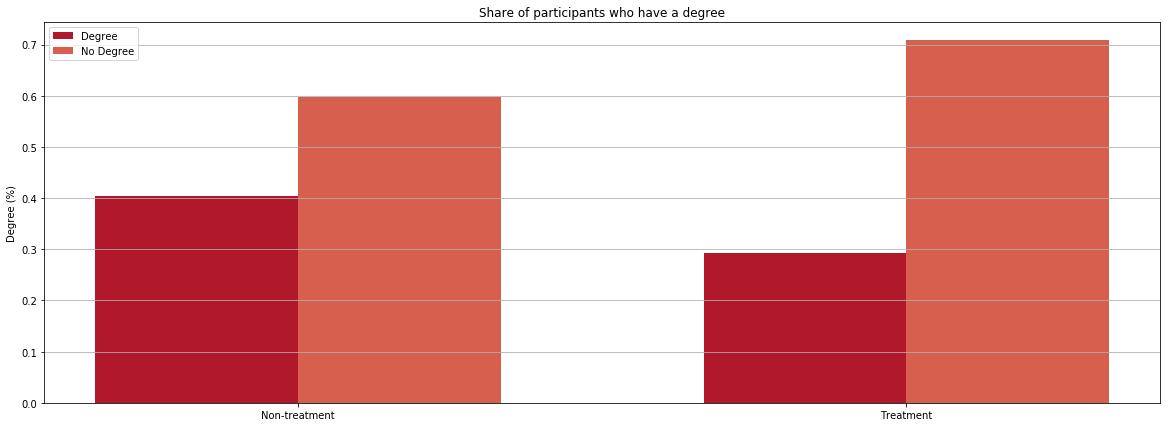

In [17]:
show_bar_plots([degree_non_treatment, nodegree_non_treatment], 
               non_treatment_count, 
               [degree_treatment, nodegree_treatment],
               treatment_count,
               ['#b2182b','#d6604d'],
               'Share of participants who have a degree',
               'Degree (%)',
               ['Degree', 'No Degree'],
               ['Non-treatment', 'Treatment'])

There is a small difference between the two groups. There is 10% more people in the treatment group who don't have a degree.

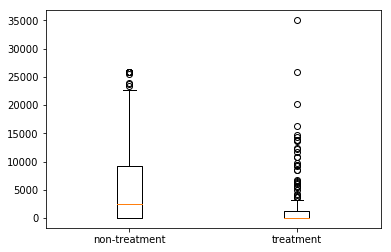

In [18]:
re74_non_treatment = data[data.treat == 0][['re74']].values
re74_treatment = data[data.treat == 1][['re74']].values

show_box_plot(re74_non_treatment, re74_treatment, 'non-treatment', 'treatment')

For the revenue in 1974, a large share of the participants seem to have an income of $0, which indicates that they had no revenue in this year.

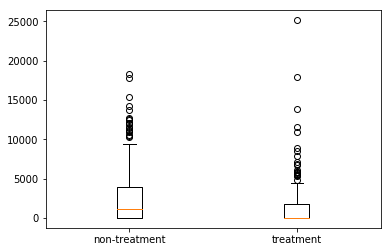

In [19]:
re75_non_treatment = data[data.treat == 0][['re75']].values
re75_treatment = data[data.treat == 1][['re75']].values

show_box_plot(re75_non_treatment, re75_treatment, 'non-treatment', 'treatment')

The results are similar to the ones for 1974.

### 3. A propensity score model

Lets start by importing `sklearn` and making preparing for logistic regression. We decrese the tolerance threshold for better convergence after testing several values.

In [20]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(max_iter=100, tol=1e-9)

To obtain the propensity scores, we need to fit our data with logistic regression. For this, we obtain the samples of our model directly from the data but remove the unnecessary columns such as the treatment, the ID and the revenue in 1978. The ID is useless while the treatment is the prediction and we actually use it as our prediction and 1978 is post experience data that we don't want to have in our fitting.

In [21]:
y = data.treat.values
X = data.drop(['id', 'treat', 're78'], axis=1).values

Now we simply fit a model with our data and logistic regression.

In [22]:
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-09,
          verbose=0, warm_start=False)

We define the propensity score as the probabilty that a sample is predicted to be in the treated group and obtain these probabilities with the following call.

In [23]:
probas = logistic.predict_proba(X)

Now we prepare a dataframe that will hold relevant information for later. The index is the same as in the original data and we have the probabilities obtained above. We keep the treatment information to separate them later. We also add the race information for the last part of the exercise.

In [24]:
score_dfs = pd.concat((pd.DataFrame(probas)[1], data.treat, data.black, data.hispan), axis=1).sort_values([1], ascending = False)

### 4. Balancing the dataset via matching

Now we will match data points according to the propensity scores. For this we use `networkx` python package. We construct a bipartite graph where each node represents a data point. Each node that represents a treated person has an edge to all the nodes that represent non-treated people.

In [25]:
import networkx as nx

g = nx.Graph()
score_dfs_treated = score_dfs[score_dfs.treat == 1]
scode_dfs_non_treated = score_dfs[score_dfs.treat == 0]

for i, r in score_dfs_treated.iterrows():
    for j, q in scode_dfs_non_treated.iterrows():
        g.add_edge(r.name, q.name, weight=1 - abs(r[1] - q[1]))

Now we do a max weight matching. The weights of edges are defined as 1 minus the absolute value of the difference of the two propensity scores of the edges. This way, max weight matching will find a matching of pairs between the two categories that minimizes the sum of the differences between the propensity scores of each pair.

In [26]:
matching = nx.max_weight_matching(g)

After obtaining the matching, we simply get the data that corresponds to it.

In [27]:
matched = data.loc[list(matching.keys())]
non_treat_matched = matched[matched.treat == 0]
treat_matched = matched[matched.treat == 1]

Now let's look at the data for revenues after the experiment.

In [28]:
matched_non_treatment = non_treat_matched[['re78']].values
matched_data_treatment = treat_matched[['re78']].values

non_treatment_count = len(matched_non_treatment)
treatment_count = len(matched_data_treatment)

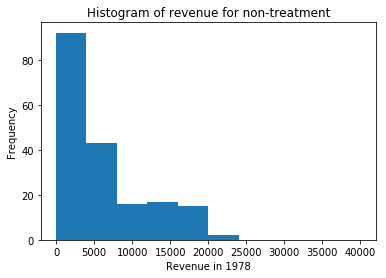

In [29]:
show_hist(matched_non_treatment, "Histogram of revenue for non-treatment", "Revenue in 1978", "Frequency")

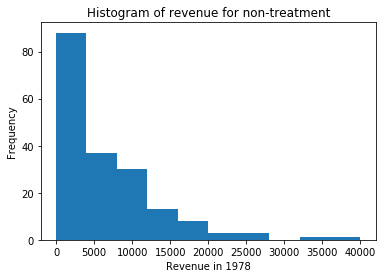

In [30]:
show_hist(matched_data_treatment, "Histogram of revenue for non-treatment", "Revenue in 1978", "Frequency")

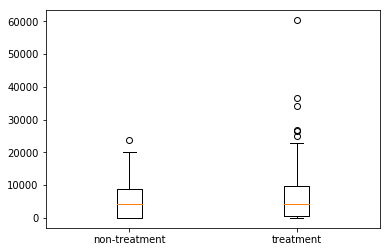

In [31]:
show_box_plot(matched_non_treatment, matched_data_treatment, 'non-treatment', 'treatment')

Looking at these plots, we see that the "treatment" population has a very slightly higher income than the non-treatment population. The conclusion now would be that the treatment is slighly efficient at increasing income of the treated people.

Now lets look at each feature again to see if our matching is good. Ideally, no or very little difference between the two population should be present.

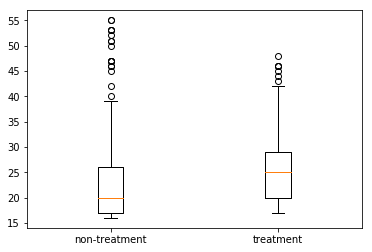

In [32]:
age_non_treatment = non_treat_matched[['age']].values
age_treatment = treat_matched[['age']].values

show_box_plot(age_non_treatment, age_treatment, 'non-treatment', 'treatment')

This time, we can see that the two population have generally a much more similar age than before, although there is still a slight difference that is the opposite from before: treated population seem to be generally slighlty older.

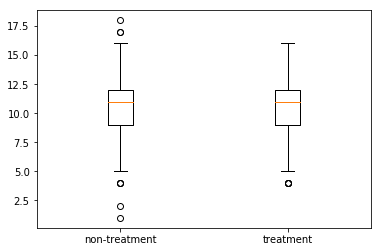

In [33]:
educ_non_treatment = non_treat_matched[['educ']].values
educ_treatment = treat_matched[['educ']].values

show_box_plot(educ_non_treatment, educ_treatment, 'non-treatment', 'treatment')

When it comes to the education, we can see that the two groups are still very similiar just like before and that a few outliers from before are removed.

In [34]:
black_non_treatment = len(non_treat_matched[non_treat_matched.black == 1])
hispan_non_treatment = len(non_treat_matched[non_treat_matched.hispan == 1])
white_non_treatment = non_treatment_count - black_non_treatment - hispan_non_treatment

black_treatment = len(treat_matched[treat_matched.black == 1])
hispan_treatment = len(treat_matched[treat_matched.hispan == 1])
white_treatment = treatment_count - black_treatment - hispan_treatment

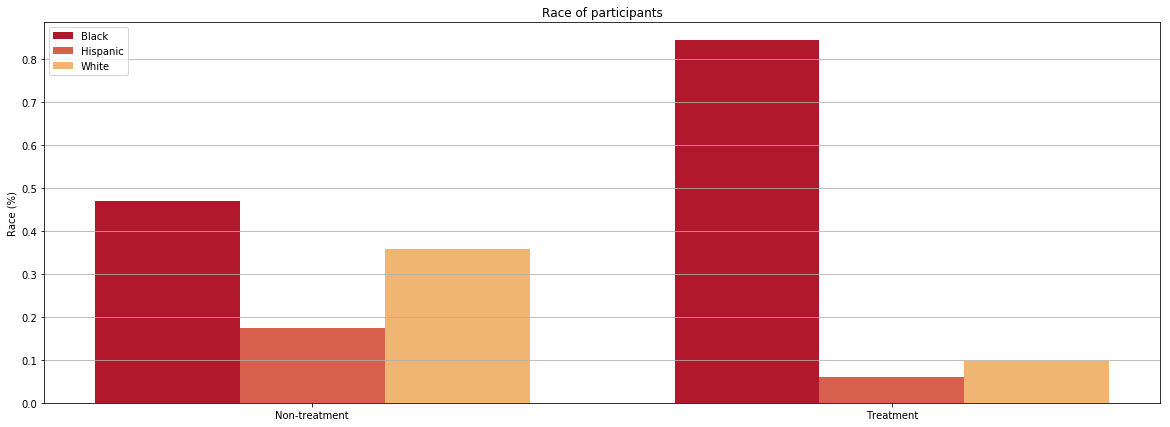

In [35]:
show_bar_plots([black_non_treatment, hispan_non_treatment, white_non_treatment], 
               non_treatment_count, 
               [black_treatment, hispan_treatment, white_treatment],
               treatment_count,
               ['#b2182b','#d6604d','#f0b572'],
               'Race of participants',
               'Race (%)',
               ['Black', 'Hispanic', 'White'],
               ['Non-treatment', 'Treatment'])

For the race feature, we can still see a very large difference. The treated population looks just like before and while the non-treated group is a bit more similar with less while people and more black people, the difference is still very large.

In [36]:
married_non_treatment = len(non_treat_matched[non_treat_matched.married == 1])
not_married_non_treatment = non_treatment_count - married_non_treatment

married_treatment = len(treat_matched[treat_matched.married == 1])
not_married_treatment = treatment_count - married_treatment

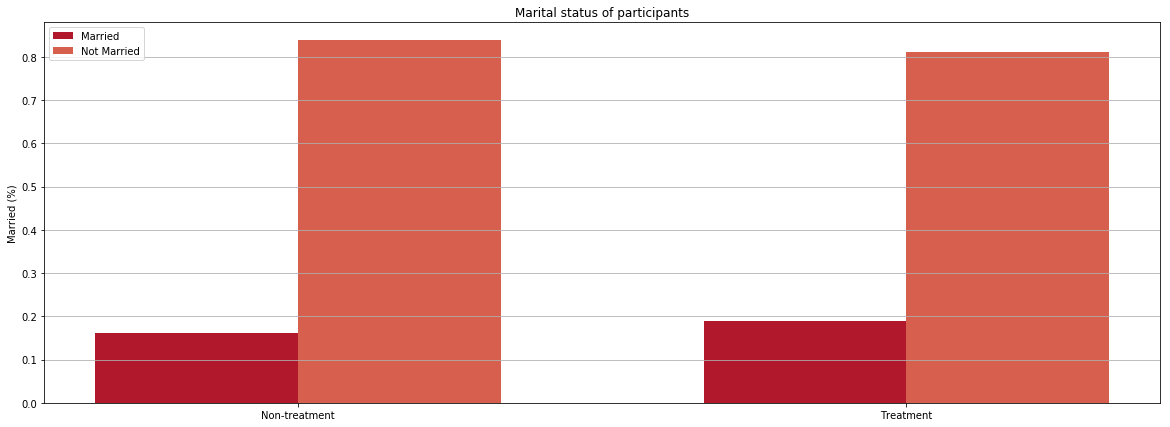

In [37]:
show_bar_plots([married_non_treatment, not_married_non_treatment], 
               non_treatment_count, 
               [married_treatment, not_married_treatment],
               treatment_count,
               ['#b2182b','#d6604d'],
               'Marital status of participants',
               'Married (%)',
               ['Married', 'Not Married'],
               ['Non-treatment', 'Treatment'])

For the martial status, we see a clear improvement from before with the two population being roughly the same now.

In [38]:
degree_non_treatment = len(non_treat_matched[non_treat_matched.nodegree == 0])
nodegree_non_treatment = non_treatment_count - degree_non_treatment

degree_treatment = len(treat_matched[treat_matched.nodegree == 0])
nodegree_treatment = treatment_count - degree_treatment

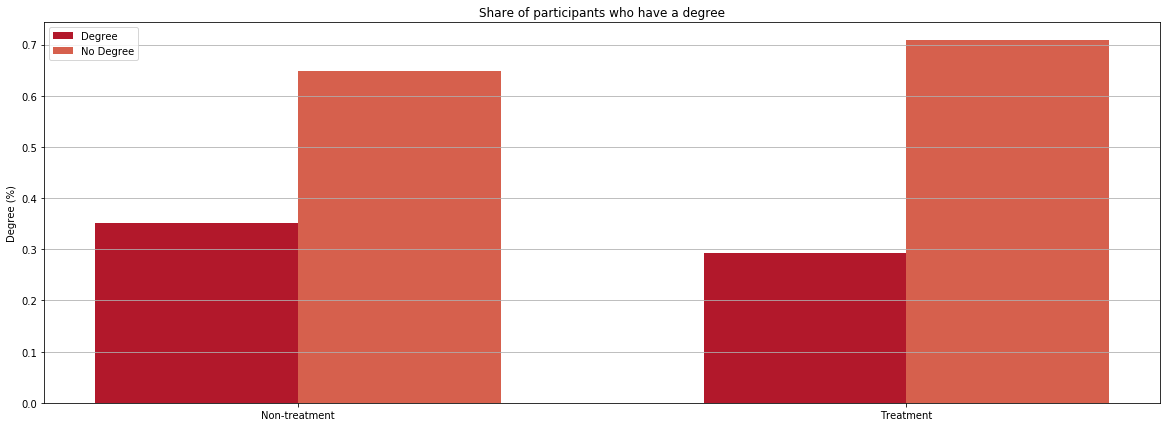

In [39]:
show_bar_plots([degree_non_treatment, nodegree_non_treatment], 
               non_treatment_count, 
               [degree_treatment, nodegree_treatment],
               treatment_count,
               ['#b2182b','#d6604d'],
               'Share of participants who have a degree',
               'Degree (%)',
               ['Degree', 'No Degree'],
               ['Non-treatment', 'Treatment'])

For the share of people with a degree, there is a slight improvement over the already rather good matching from before.

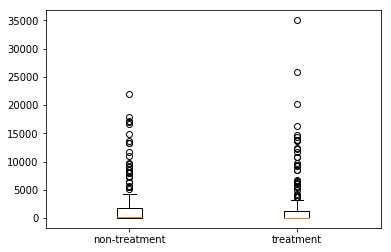

In [40]:
re74_non_treatment = non_treat_matched[['re74']].values
re74_treatment = treat_matched[['re74']].values

show_box_plot(re74_non_treatment, re74_treatment, 'non-treatment', 'treatment')

The improvement for the revenue in 1974 is also present and now, the two populations seem to be very well matched in terms of this feature.

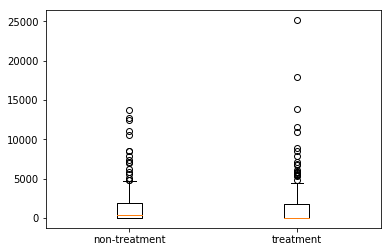

In [41]:
re75_non_treatment = non_treat_matched[['re75']].values
re75_treatment = treat_matched[['re75']].values

show_box_plot(re75_non_treatment, re75_treatment, 'non-treatment', 'treatment')

Just like for 1974, a large improvement can be observed.

We can see that in general, we have a much better matching now and the conclusions we can take from the data will be much more accurate now. While  each feature doesn't match exactly between the two populations, it does so much better than before for all features except the race.

### 5. Balancing the groups further

Unfortunately, the race feature, still having a very large difference between the two populations, makes this matching not satisfying enough. To make the dataset more balanced, we would need to match this feature better than before. If we could obtain a much better matching for the race feature, the balanced dataset could give us the best insights as to the effectiveness of the treatment.

For this reason, we will match the populations again but now explicitly match individuals with the same race, but otherwise using the same graph technique as before.

In [42]:
g = nx.Graph()
score_dfs_treated = score_dfs[score_dfs.treat == 1]
scode_dfs_non_treated = score_dfs[score_dfs.treat == 0]

for i, r in score_dfs_treated.iterrows():
    for j, q in scode_dfs_non_treated.iterrows():
        if r.black == q.black and r.hispan == q.hispan:
            g.add_edge(r.name, q.name, weight=1 - abs(r[1] - q[1]))

In [43]:
matching = nx.max_weight_matching(g)

In [44]:
matched = data.loc[list(matching.keys())]
non_treat_rematched = matched[matched.treat == 0]
treat_rematched = matched[matched.treat == 1]

We can now verify that the race feature is well balanced.

In [45]:
black_non_treatment = len(non_treat_rematched[non_treat_rematched.black == 1])
hispan_non_treatment = len(non_treat_rematched[non_treat_rematched.hispan == 1])
white_non_treatment = non_treatment_count - black_non_treatment - hispan_non_treatment

black_treatment = len(treat_rematched[treat_rematched.black == 1])
hispan_treatment = len(treat_rematched[treat_rematched.hispan == 1])
white_treatment = treatment_count - black_treatment - hispan_treatment

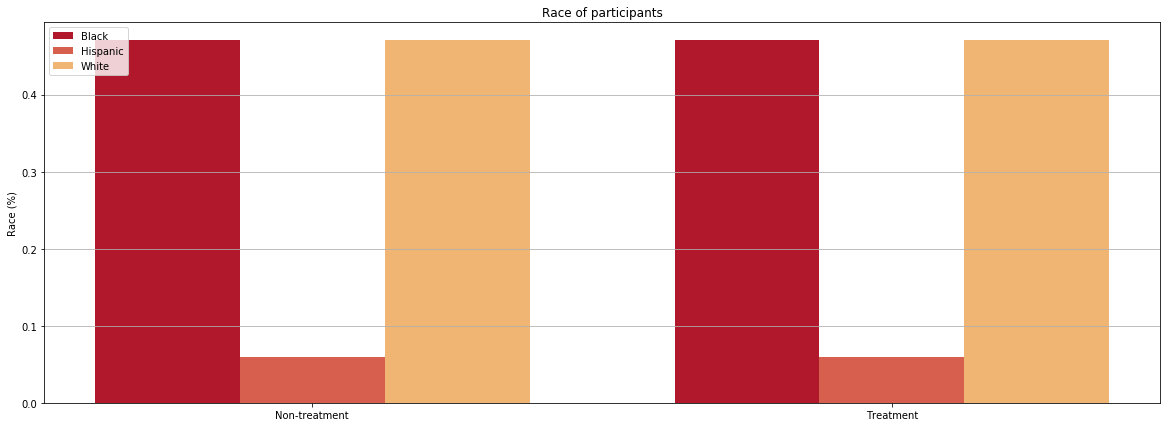

In [46]:
show_bar_plots([black_non_treatment, hispan_non_treatment, white_non_treatment], 
               non_treatment_count, 
               [black_treatment, hispan_treatment, white_treatment],
               treatment_count,
               ['#b2182b','#d6604d','#f0b572'],
               'Race of participants',
               'Race (%)',
               ['Black', 'Hispanic', 'White'],
               ['Non-treatment', 'Treatment'])

Indeed, since we did the exact matching on the race, the two populations now are exactly the same when it comes to this feature.

Now to make sure our matching is balanced for the other features as well, let's again see the distributions for each feature.

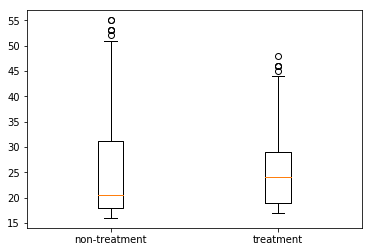

In [47]:
age_non_treatment = non_treat_rematched[['age']].values
age_treatment = treat_rematched[['age']].values

show_box_plot(age_non_treatment, age_treatment, 'non-treatment', 'treatment')

For the age, we can see a difference from before. In fact, this feature seems to be a bit less balanced now although the numbers are still pretty similar between the two populations.

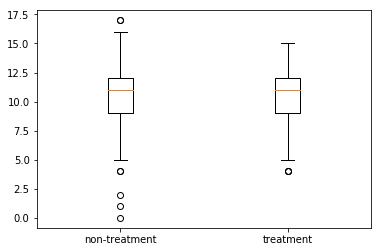

In [48]:
educ_non_treatment = non_treat_rematched[['educ']].values
educ_treatment = treat_rematched[['educ']].values

show_box_plot(educ_non_treatment, educ_treatment, 'non-treatment', 'treatment')

Education level remains very similar.

In [49]:
married_non_treatment = len(non_treat_rematched[non_treat_rematched.married == 1])
not_married_non_treatment = non_treatment_count - married_non_treatment

married_treatment = len(treat_rematched[treat_rematched.married == 1])
not_married_treatment = treatment_count - married_treatment

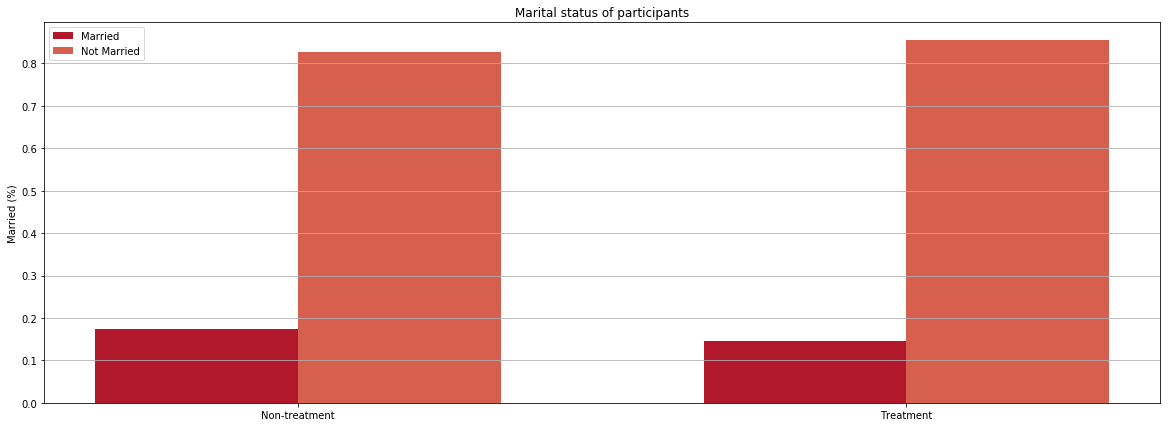

In [50]:
show_bar_plots([married_non_treatment, not_married_non_treatment], 
               non_treatment_count, 
               [married_treatment, not_married_treatment],
               treatment_count,
               ['#b2182b','#d6604d'],
               'Marital status of participants',
               'Married (%)',
               ['Married', 'Not Married'],
               ['Non-treatment', 'Treatment'])

Martial status of the two population is still very well balanced.

In [51]:
degree_non_treatment = len(non_treat_rematched[non_treat_rematched.nodegree == 0])
nodegree_non_treatment = non_treatment_count - degree_non_treatment

degree_treatment = len(treat_rematched[treat_rematched.nodegree == 0])
nodegree_treatment = treatment_count - degree_treatment

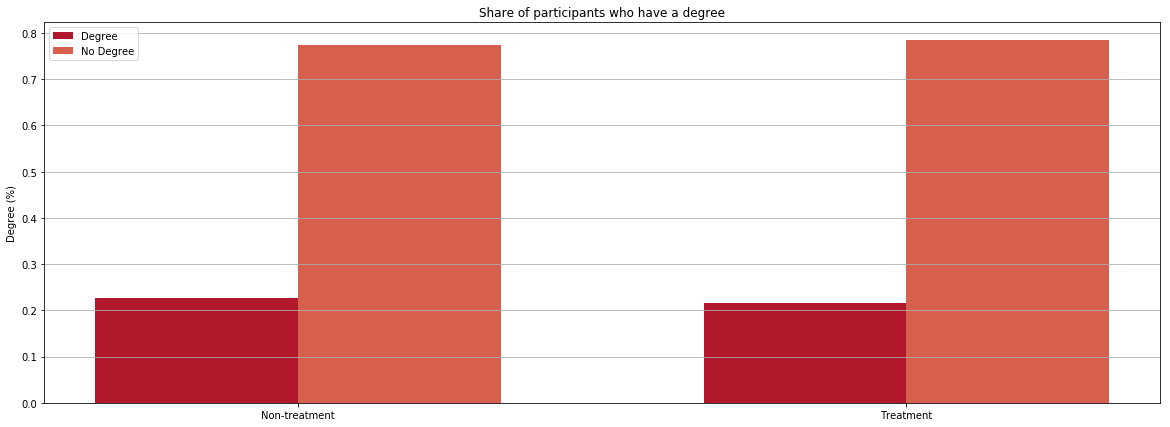

In [52]:
show_bar_plots([degree_non_treatment, nodegree_non_treatment], 
               non_treatment_count, 
               [degree_treatment, nodegree_treatment],
               treatment_count,
               ['#b2182b','#d6604d'],
               'Share of participants who have a degree',
               'Degree (%)',
               ['Degree', 'No Degree'],
               ['Non-treatment', 'Treatment'])

The share of people with a degree experienced a slight improvement in balance from the last matching.

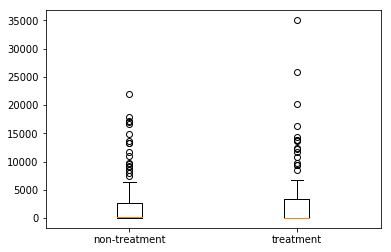

In [53]:
re74_non_treatment = non_treat_rematched[['re74']].values
re74_treatment = treat_rematched[['re74']].values

show_box_plot(re74_non_treatment, re74_treatment, 'non-treatment', 'treatment')

Revenue in 1974 is very well balanced now just like before.

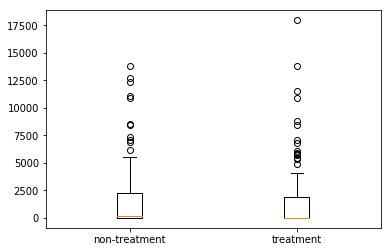

In [54]:
re75_non_treatment = non_treat_rematched[['re75']].values
re75_treatment = treat_rematched[['re75']].values

show_box_plot(re75_non_treatment, re75_treatment, 'non-treatment', 'treatment')

The revenue in 1975 is a bit less balanced than before although the figures are still very similar.

After looking at the distributions for each variable, we can consider that this matching is well balanced and in fact more so than the first matching. While some of the features such as the age and the revenue in 1974 are slighly less balanced, the huge improvement in the race feature is a very considerable tradeoff. This feature was exetremly different in the first matching and now it is exactly matched. For this reason, we can have much more accurate conclusions from the data than from the first matching and especially than when no matching was applied.

### 6. A less naive analysis

In [55]:
matched_non_treatment = non_treat_rematched[['re78']].values
matched_data_treatment = treat_rematched[['re78']].values

non_treatment_count = len(matched_non_treatment)
treatment_count = len(matched_data_treatment)

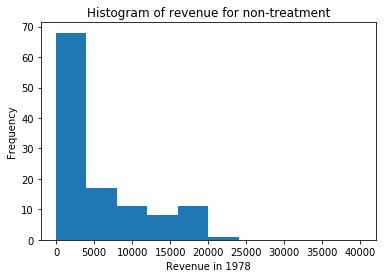

In [56]:
show_hist(matched_non_treatment, "Histogram of revenue for non-treatment", "Revenue in 1978", "Frequency")

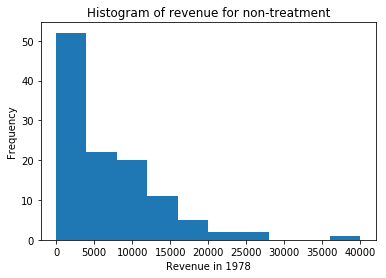

In [57]:
show_hist(matched_data_treatment, "Histogram of revenue for non-treatment", "Revenue in 1978", "Frequency")

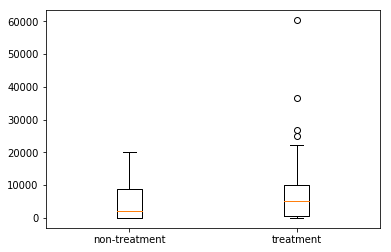

In [58]:
show_box_plot(matched_non_treatment, matched_data_treatment, 'non-treatment', 'treatment')

And in fact, we can now see that the difference in the revenue in 1978 is considerable. The treatment population have, in general, a better revenue in that year than the non-treated group. The difference is much larger than when we haven't matched or in the first matching.

From this we can conclude that the training program is effective at improving the revenue of people that take the program.

# Question 2: Applied ML

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

We begin by fetching the 20 NewsGroups data. Since we need to split the data manually into train, test and validation sets, we fetch the whole dataset.

In [60]:
newsgroups_train = fetch_20newsgroups(subset='all')

Next we use the `TfidfVectorizer` to vectorize the data.

In [61]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

Since we want to manually split the data into three sets, we generate the row indices of our matrix and shuffle them so that our sets are random. Then we take 10% for testing, 10% for validation and the remaining for training.

In [62]:
randIndex = np.arange(vectors.shape[0])

In [63]:
np.random.shuffle(randIndex)

In [64]:
test_indices = randIndex[:int(vectors.shape[0] / 10)]
validation_indices = randIndex[int(vectors.shape[0] / 10) : 2 * int(vectors.shape[0] / 10)]
train_indices = randIndex[2 * int(vectors.shape[0] / 10):]

In [65]:
test = vectors[test_indices]
validation = vectors[validation_indices]
train = vectors[train_indices]

We have to keep the information about the labels of the data since we lost it after the vectorization. So in the same way we take the test, validation and training labels from the original date. These vectors are simply indices to the categories array in `newsgroup_train.target_names`.

In [66]:
test_target = newsgroups_train.target[test_indices]
validation_target = newsgroups_train.target[validation_indices]
train_target = newsgroups_train.target[train_indices]

Next we do a grid search over the parameters. The bounds of the ranges of the parameters have been found by manually trying a few values. Moreover we don't recompute this value each time we run the notebook because it takes a very long time but still need to do a single iteration to obtain the best classifier.

In [98]:
#n_estimatorss = [10, 50, 100, 200, 300, 500, 700, 1500]
#max_depths = [10, 25, None]
#max_depths.append(None)
n_estimatorss = [1500]
max_depths = [None]

In [99]:
best_score = 0
best_clf = None
for n_estimators in n_estimatorss:
    for max_depth in max_depths:
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        clf = clf.fit(train, train_target)
        score = clf.score(validation, validation_target)
        if score > best_score:
            best_score = score
            best_clf = clf
print("Best classifier : ", n_estimators, max_depth, score)

Best classifier :  1500 None 0.864649681529


As you can see, the best estimator has a score of XX which is the accuracy of the model on the validation set.

Next we predict the values of the testing set. Now, we have the predicted labels of the testing samples and the actual labels of the testing samples. So we can construct the confusion matrix simply by iterating over the predicted labels and incrementing the values in the matrix depending on the predicted and actual labels.

In [100]:
y_pred = best_clf.predict(test)

In [101]:
dim = len(newsgroups_train.target_names)
confusion_matrix = np.zeros((dim, dim))

In [102]:
for i in range(y_pred.shape[0]):
    predicted = y_pred[i]
    actual = test_target[i]
    confusion_matrix[predicted, actual] += 1

Next we display the resulting confusion matrix.

In [103]:
pd.DataFrame(confusion_matrix, dtype=int, columns=newsgroups_train.target_names, index=newsgroups_train.target_names)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
comp.graphics,0,95,4,6,2,6,0,1,1,2,0,4,4,3,2,0,0,1,0,0
comp.os.ms-windows.misc,0,5,99,8,0,4,1,0,0,0,0,1,1,0,1,0,1,0,1,0
comp.sys.ibm.pc.hardware,0,2,5,79,1,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0
comp.sys.mac.hardware,0,5,0,1,81,1,0,1,0,0,0,1,2,0,0,0,1,0,1,0
comp.windows.x,0,3,1,1,0,77,0,1,0,1,0,1,0,0,0,1,0,0,0,0
misc.forsale,1,2,0,2,2,0,83,6,1,2,0,0,2,2,0,2,0,0,0,0
rec.autos,0,0,1,0,0,0,0,87,2,1,0,0,2,0,0,0,1,0,1,0
rec.motorcycles,1,0,0,0,0,0,0,2,89,0,0,0,0,0,0,0,0,0,0,0
rec.sport.baseball,0,0,0,0,0,0,0,1,0,93,0,0,1,1,0,0,0,1,0,0


We can see that most of the values in the matrix are on the diagonal. This is normal because after all, our classifier had an accuracy of XX which means that it should classify most samples in the correct way. The matrix further confirms it.